In [2]:
import pandas as pd
import numpy as np
import os
import sys

In [3]:
from pathlib import Path

In [4]:
project_root = Path.cwd().parent
sys.path.append(str(project_root))
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 25)

In [5]:
data_path = project_root / 'extracted_data' / 'rossmann-store-sales' / 'train.csv'
df = pd.read_csv(data_path, low_memory=False)

In [6]:
from analysis.analyze_src import DataInspector, DataTypesInspectionStrategy, SummaryStatisticsInspectionStrategy

In [7]:
data_inspector = DataInspector(DataTypesInspectionStrategy())
data_inspector.execute_inspection(df)


Data Types and Non-null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [8]:
data_inspector.set_strategy(SummaryStatisticsInspectionStrategy())
data_inspector.execute_inspection(df)


Summary Statistics (Numerical Features):
           Store  DayOfWeek      Sales  Customers       Open      Promo SchoolHoliday
count  1,017,209  1,017,209  1,017,209  1,017,209  1,017,209  1,017,209     1,017,209
mean         558          4      5,774        633          1          0             0
std          322          2      3,850        464          0          0             0
min            1          1          0          0          0          0             0
25%          280          2      3,727        405          1          0             0
50%          558          4      5,744        609          1          0             0
75%          838          6      7,856        837          1          1             0
max        1,115          7     41,551      7,388          1          1             1

Summary Statistics (Categorical Features):


,Date,StateHoliday
count,1017209,1017209
unique,942,4
top,2015-07-31,0
freq,1115,986159


In [9]:
from analysis.analyze_src import MissingValuesAnalysisTemplate, SimpleMissingValuesAnalysis

In [10]:
missing_values = SimpleMissingValuesAnalysis()
missing_values.analyze(df)


Missing Values Count by Column:
No missing values found in the dataset.

No missing values to visualize.


In [11]:
from analysis.analyze_src import UnivariateAnalyzer, NumericalUnivariateAnalysis, CategoricalUnivariateAnalysis

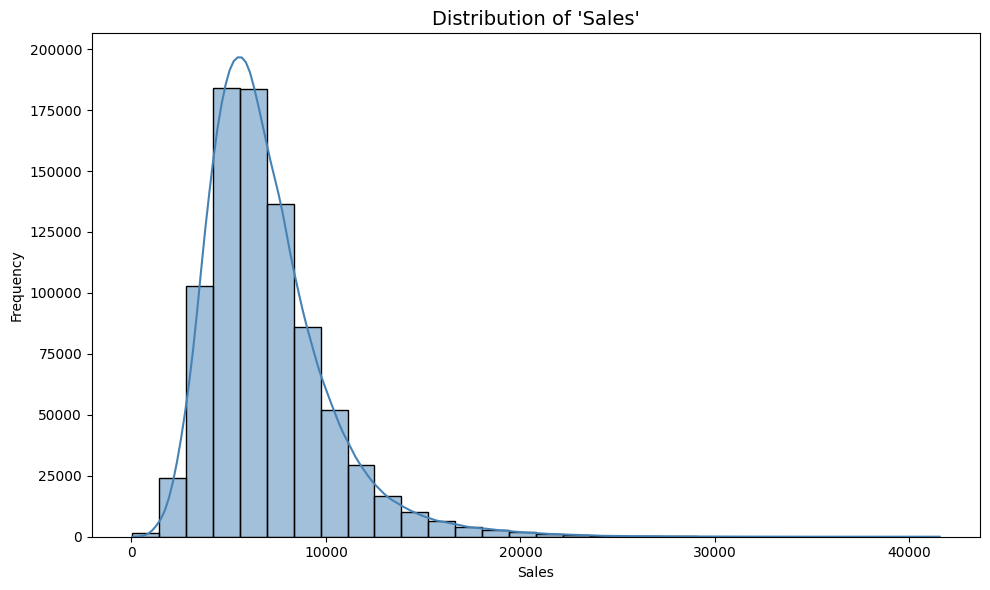

In [12]:
univariate_analyzer = UnivariateAnalyzer(NumericalUnivariateAnalysis())
univariate_analyzer.execute_analysis(df, 'Sales')

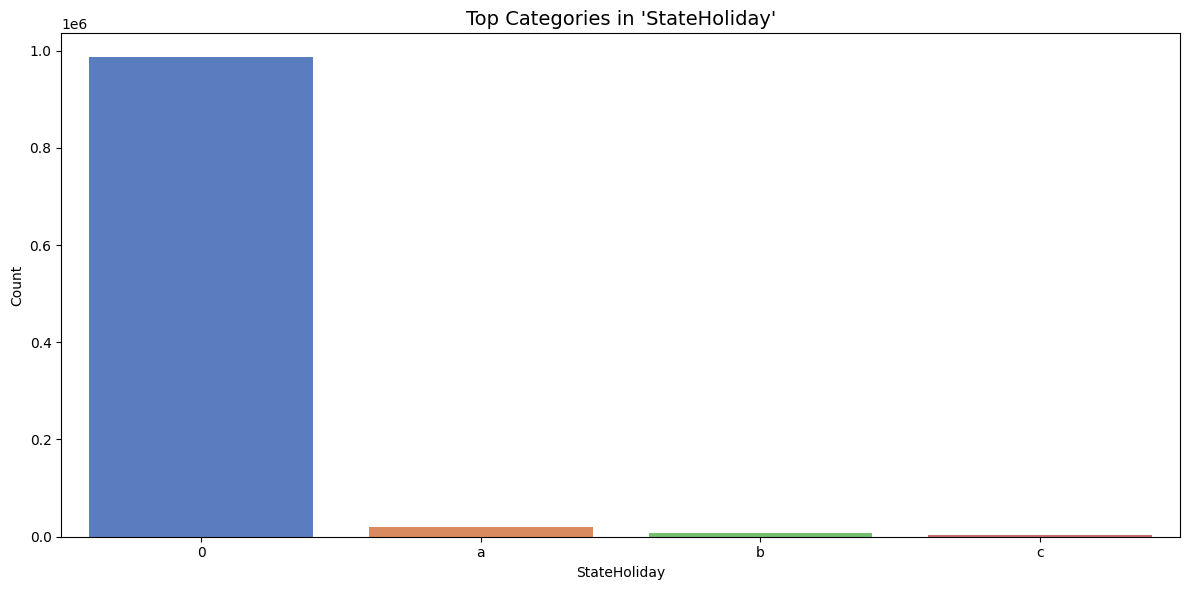

In [13]:
univariate_analyzer.set_strategy(CategoricalUnivariateAnalysis())
univariate_analyzer.execute_analysis(df, 'StateHoliday')
